In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols # ols functions
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

##Uploading the basketball dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MarchMadnessData_Updated.csv to MarchMadnessData_Updated.csv


In [ ]:
import io
mmd = pd.read_csv(io.BytesIO(uploaded['MarchMadnessData_Updated.csv']))

In [ ]:
mmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876 entries, 0 to 3875
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3876 non-null   object 
 1   CONF        3876 non-null   object 
 2   G           3876 non-null   int64  
 3   W           3876 non-null   int64  
 4   ADJOE       3876 non-null   float64
 5   ADJDE       3876 non-null   float64
 6   BARTHAG     3876 non-null   float64
 7   EFG_O       3876 non-null   float64
 8   EFG_D       3876 non-null   float64
 9   TOR         3876 non-null   float64
 10  TORD        3876 non-null   float64
 11  ORB         3876 non-null   float64
 12  DRB         3876 non-null   float64
 13  FTR         3876 non-null   float64
 14  FTRD        3876 non-null   float64
 15  2P_O        3876 non-null   float64
 16  2P_D        3876 non-null   float64
 17  3P_O        3876 non-null   float64
 18  3P_D        3876 non-null   float64
 19  ADJ_T       3876 non-null  

In [ ]:
mmd.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,Year
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.00000,3876.000000,3876.000000,3876.000000,3876.000000
mean,30.458978,16.019350,103.068498,103.070253,0.494397,49.858746,50.043318,18.716899,18.649897,29.179154,29.375697,34.357353,34.619479,49.141331,49.30178,34.094737,34.268885,67.786455,2018.026316
std,3.799303,6.481329,7.225552,6.509092,0.254874,3.054706,2.887641,2.097420,2.243638,4.214135,3.239514,5.485264,6.382125,3.373242,3.30582,2.730396,2.451837,3.057528,3.168120
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.200000,18.400000,19.600000,16.500000,37.700000,37.70000,24.800000,26.100000,57.200000,2013.000000
25%,29.000000,11.000000,98.100000,98.300000,0.281350,47.900000,48.100000,17.300000,17.100000,26.300000,27.100000,30.500000,30.000000,46.900000,47.10000,32.200000,32.600000,65.800000,2015.000000
50%,31.000000,16.000000,102.700000,103.100000,0.476050,49.800000,50.000000,18.600000,18.500000,29.300000,29.350000,34.200000,33.900000,49.100000,49.30000,34.100000,34.200000,67.800000,2018.000000
75%,33.000000,21.000000,107.800000,107.600000,0.714475,51.900000,52.000000,20.100000,20.100000,32.000000,31.600000,38.000000,38.600000,51.400000,51.60000,35.900000,35.900000,69.700000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,40.400000,58.600000,60.700000,64.000000,61.20000,44.100000,43.100000,83.400000,2023.000000


In [ ]:
mmd.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,Year,Pre-Covid?,POSTSEASON
0,Indiana,B10,36,29,121.0,89.7,0.9692,54.7,44.0,19.3,...,45.8,27.0,52.0,43.2,40.3,30.4,67.8,2013,Yes,S16
1,Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,...,40.8,29.9,55.0,42.1,36.5,32.9,65.1,2013,Yes,R32
2,Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,...,39.5,32.0,52.9,39.3,36.4,30.3,67.7,2013,Yes,S16
3,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,40.0,34.9,50.8,43.4,33.3,31.8,67.1,2013,Yes,Champions
4,Georgetown,BE,32,25,107.6,85.0,0.9381,51.1,43.0,20.1,...,36.8,35.3,50.2,41.4,35.3,30.7,62.5,2013,Yes,R64
5,Miami FL,ACC,36,29,112.4,90.8,0.9207,51.9,45.7,16.7,...,34.6,28.3,50.6,44.0,36.2,32.6,63.0,2013,Yes,S16
6,Ohio St.,B10,37,29,113.6,89.4,0.9406,50.6,45.4,16.2,...,35.5,29.5,49.4,43.6,35.6,32.4,65.3,2013,Yes,E8
7,Duke,ACC,36,30,118.4,91.5,0.9507,53.9,45.5,15.6,...,39.2,32.7,50.8,46.2,39.9,29.0,67.8,2013,Yes,E8
8,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,36.6,32.4,50.4,44.3,34.1,30.1,64.4,2013,Yes,S16
9,Marquette,BE,35,26,113.0,93.2,0.9020,49.6,46.2,20.9,...,40.9,31.7,51.6,44.9,29.6,32.3,64.6,2013,Yes,E8


In [ ]:
mmd.set_index('TEAM')

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,Year,Pre-Covid?,POSTSEASON
TEAM,,,,,,,,,,,,,,,,,,,,,
Indiana,B10,36,29,121.0,89.7,0.9692,54.7,44.0,19.3,20.9,...,45.8,27.0,52.0,43.2,40.3,30.4,67.8,2013,Yes,S16
Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,20.8,...,40.8,29.9,55.0,42.1,36.5,32.9,65.1,2013,Yes,R32
Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,18.4,...,39.5,32.0,52.9,39.3,36.4,30.3,67.7,2013,Yes,S16
Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,27.0,...,40.0,34.9,50.8,43.4,33.3,31.8,67.1,2013,Yes,Champions
Georgetown,BE,32,25,107.6,85.0,0.9381,51.1,43.0,20.1,22.4,...,36.8,35.3,50.2,41.4,35.3,30.7,62.5,2013,Yes,R64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,18.3,...,34.4,27.5,54.6,52.1,39.7,36.1,69.5,2023,No,NaN
Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,18.9,...,26.2,27.8,56.4,48.6,36.4,33.6,64.4,2023,No,NaN
Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,16.3,...,35.6,28.7,52.5,42.8,33.4,31.1,69.8,2023,No,NaN


## Exploratory Data Analysis (Pravah)

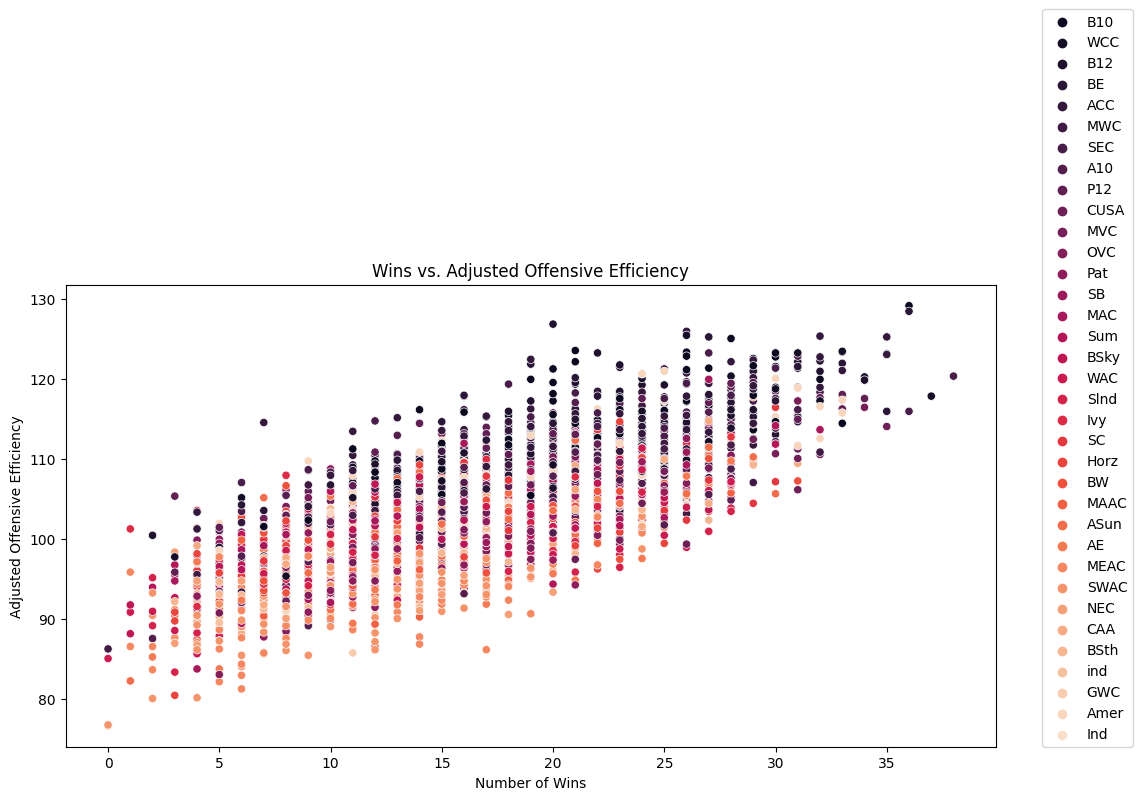

In [ ]:
# Scatter plot: Wins vs. Adjusted Offensive Efficiency
plt.figure(figsize=(12, 6))
sns.scatterplot(x='W', y='ADJOE', data=mmd, hue='CONF', palette='rocket')
plt.title('Wins vs. Adjusted Offensive Efficiency')
plt.xlabel('Number of Wins')
plt.ylabel('Adjusted Offensive Efficiency')
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)  # Adjust the legend position
plt.show()

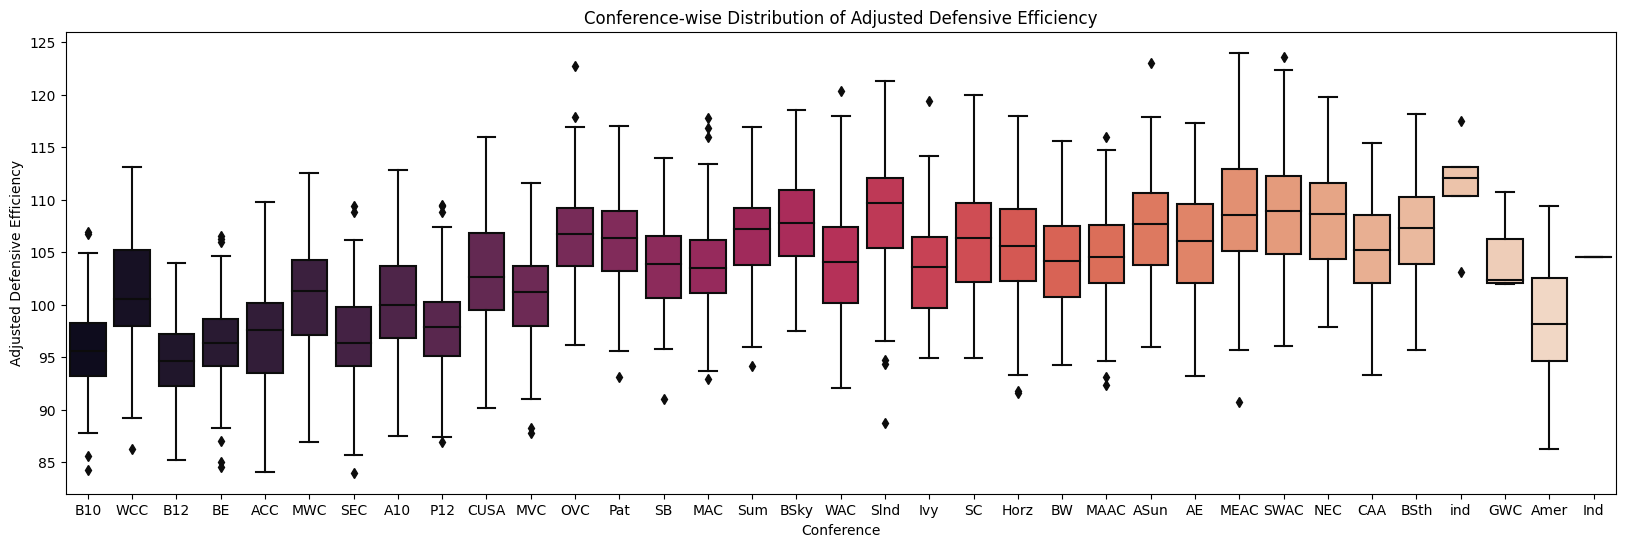

In [ ]:
# Boxplot: Conference-wise distribution of Adjusted Defensive Efficiency
plt.figure(figsize=(20, 6))
sns.boxplot(x='CONF', y='ADJDE', data=mmd, palette='rocket')
plt.title('Conference-wise Distribution of Adjusted Defensive Efficiency')
plt.xlabel('Conference')
plt.ylabel('Adjusted Defensive Efficiency')
plt.show()

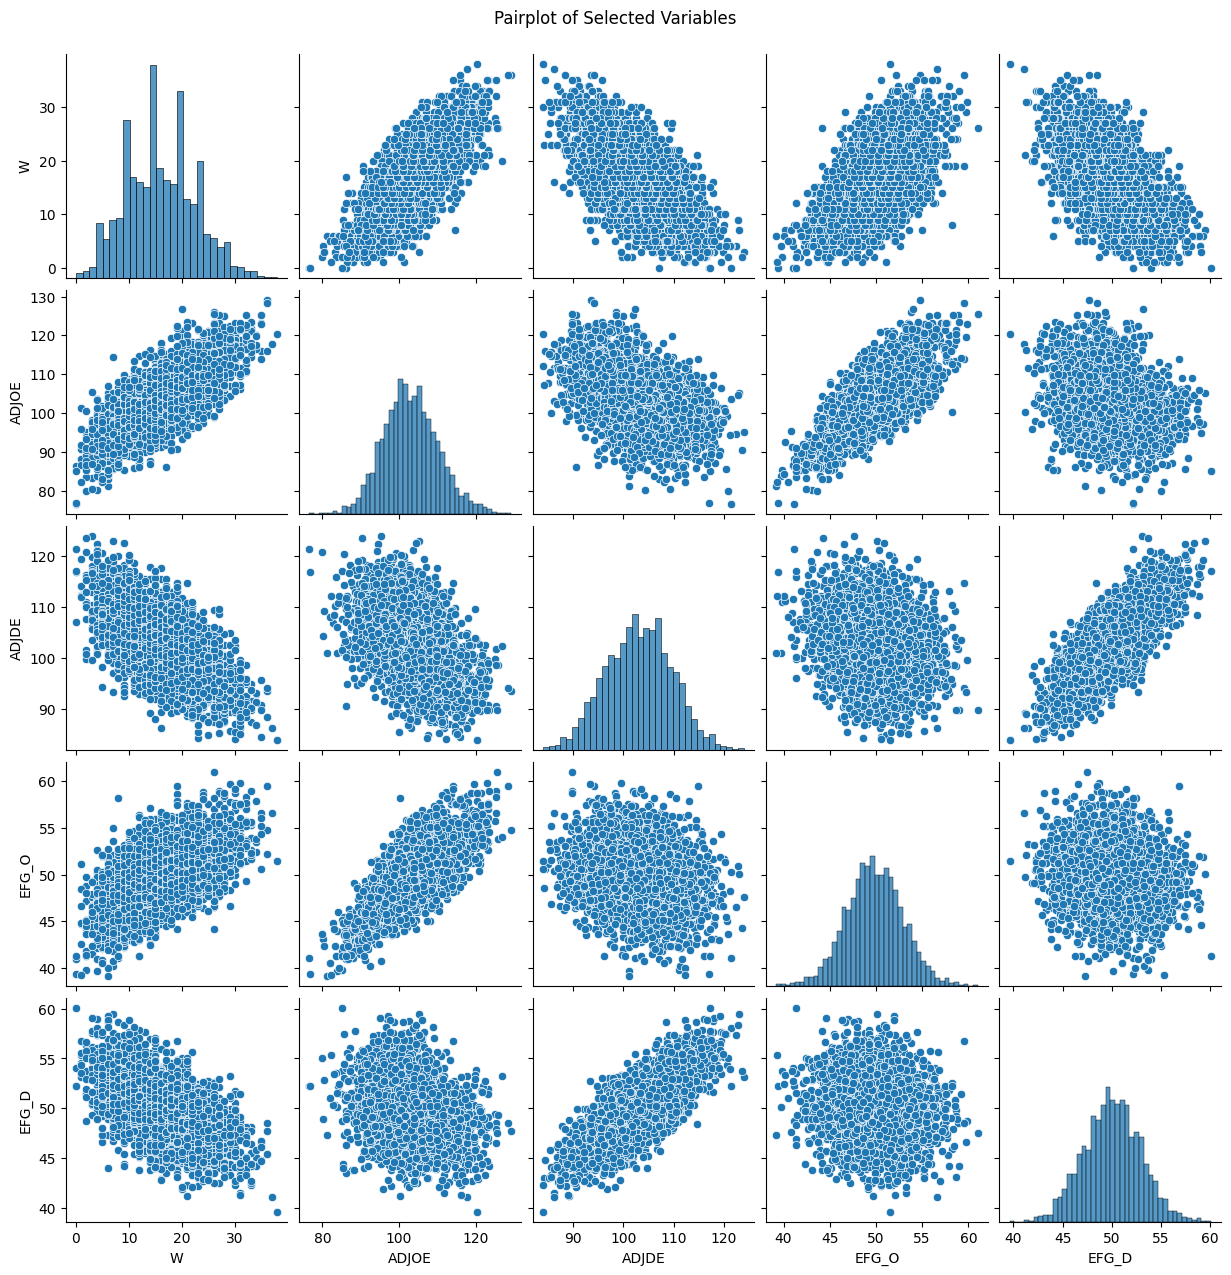

In [ ]:
# Pairplot: Relationship between selected variables
selected_columns = ['W', 'ADJOE', 'ADJDE', 'EFG_O', 'EFG_D']
sns.pairplot(mmd[selected_columns])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

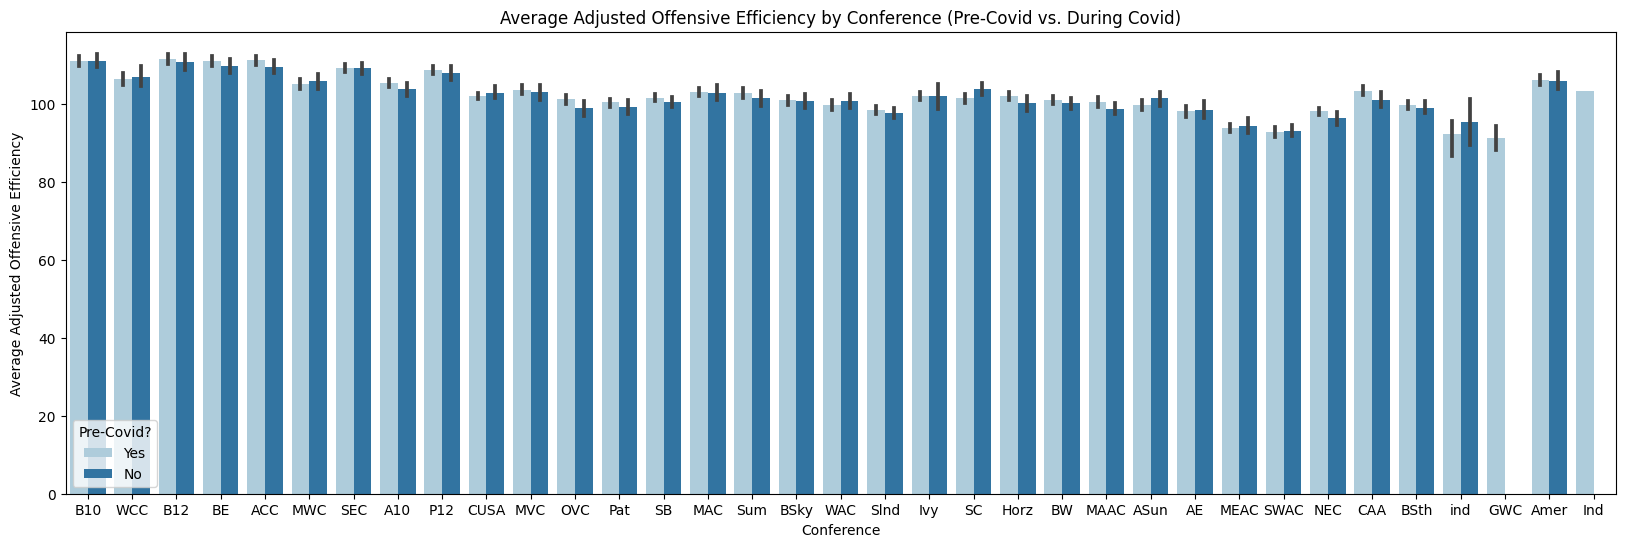

In [ ]:
# Bar plot: Average Adjusted Offensive Efficiency by Conference, separated by Pre-Covid
plt.figure(figsize=(20, 6))
sns.barplot(x='CONF', y='ADJOE', data=mmd, hue='Pre-Covid?', palette='Paired')
plt.title('Average Adjusted Offensive Efficiency by Conference (Pre-Covid vs. During Covid)')
plt.xlabel('Conference')
plt.ylabel('Average Adjusted Offensive Efficiency')
plt.show()

<ipython-input-13-9d4775f0867b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mmd.corr()


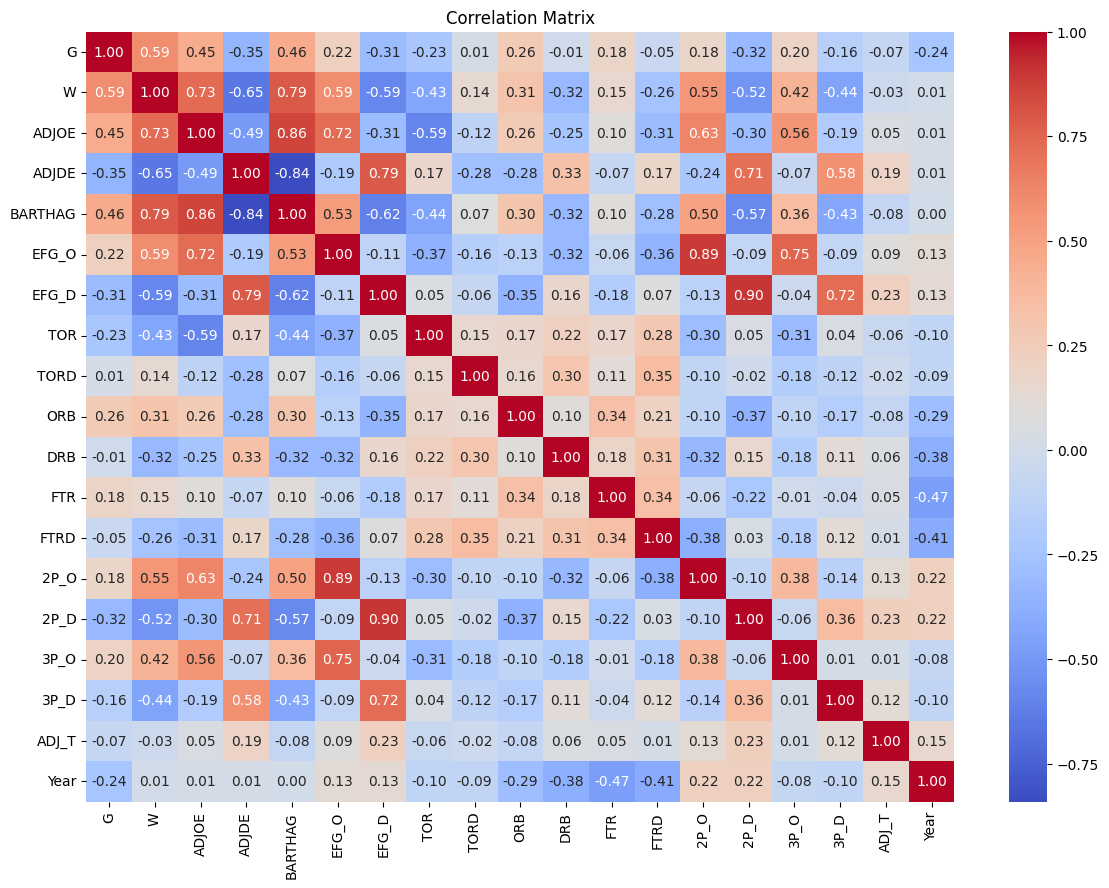

In [ ]:
# Heatmap: Correlation matrix
correlation_matrix = mmd.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate win percentage
mmd['WIN_PERCENTAGE'] = (mmd['W'] / mmd['G']) * 100

# Group by conference and calculate the average win percentage
conference_win_percentage = mmd.groupby('CONF')['WIN_PERCENTAGE'].mean()

In [ ]:
# Separate data for Pre-Covid and Post-Covid periods
pre_covid_data = mmd[mmd['Pre-Covid?'] == 'Yes']
post_covid_data = mmd[mmd['Pre-Covid?'] == 'No']

# Calculate average win percentage for each team in Pre-Covid
avg_win_percentage_pre_covid = pre_covid_data.groupby('TEAM')['WIN_PERCENTAGE'].mean().reset_index()

# Calculate average win percentage for each team in Post-Covid
avg_win_percentage_post_covid = post_covid_data.groupby('TEAM')['WIN_PERCENTAGE'].mean().reset_index()

# Merge the two datasets to compare Pre-Covid and Post-Covid win percentages
merged_data = pd.merge(avg_win_percentage_pre_covid, avg_win_percentage_post_covid, on='TEAM', suffixes=('_pre_covid', '_post_covid'))

# Calculate the difference in win percentages
merged_data['Win_Percentage_Difference'] = merged_data['WIN_PERCENTAGE_post_covid'] - merged_data['WIN_PERCENTAGE_pre_covid']

# Display the top and bottom teams based on improvement/fall-off
top_improved_teams = merged_data.sort_values(by='Win_Percentage_Difference', ascending=False).head(5)
top_fallen_off_teams = merged_data.sort_values(by='Win_Percentage_Difference').head(5)

print("Top Improved Teams:")
print(top_improved_teams[['TEAM', 'WIN_PERCENTAGE_pre_covid', 'WIN_PERCENTAGE_post_covid', 'Win_Percentage_Difference']])

print("\nTop Fallen Off Teams:")
print(top_fallen_off_teams[['TEAM', 'WIN_PERCENTAGE_pre_covid', 'WIN_PERCENTAGE_post_covid', 'Win_Percentage_Difference']])


Top Improved Teams:
                 TEAM  WIN_PERCENTAGE_pre_covid  WIN_PERCENTAGE_post_covid  \
274     Southern Utah                 31.689290                  82.562467   
147          Longwood                 28.517545                  66.922095   
70              Drake                 43.955963                  81.844590   
87   Florida Atlantic                 38.870938                  74.768657   
222      Oral Roberts                 45.782567                  78.065518   

     Win_Percentage_Difference  
274                  50.873177  
147                  38.404549  
70                   37.888626  
87                   35.897718  
222                  32.282951  

Top Fallen Off Teams:
               TEAM  WIN_PERCENTAGE_pre_covid  WIN_PERCENTAGE_post_covid  \
105       Green Bay                 59.469122                  19.538793   
151      Louisville                 73.920092                  39.375000   
81       Evansville                 51.034073                 

In [ ]:
# Separate data for Pre-Covid and Post-Covid periods
maryland_pre_covid = mmd[(mmd['TEAM'] == 'Maryland') & (mmd['Pre-Covid?'] == 'Yes')]
maryland_post_covid = mmd[(mmd['TEAM'] == 'Maryland') & (mmd['Pre-Covid?'] == 'No')]

# Calculate average win percentage for Maryland in Pre-Covid
avg_win_percentage_maryland_pre_covid = maryland_pre_covid['WIN_PERCENTAGE'].mean()

# Calculate average win percentage for Maryland in Post-Covid
avg_win_percentage_maryland_post_covid = maryland_post_covid['WIN_PERCENTAGE'].mean()

# Display the results
print(f"Average Win Percentage for Maryland Before Covid: {avg_win_percentage_maryland_pre_covid:.2f}%")
print(f"Average Win Percentage for Maryland After Covid: {avg_win_percentage_maryland_post_covid:.2f}%")


Average Win Percentage for Maryland Before Covid: 69.32%
Average Win Percentage for Maryland After Covid: 55.62%


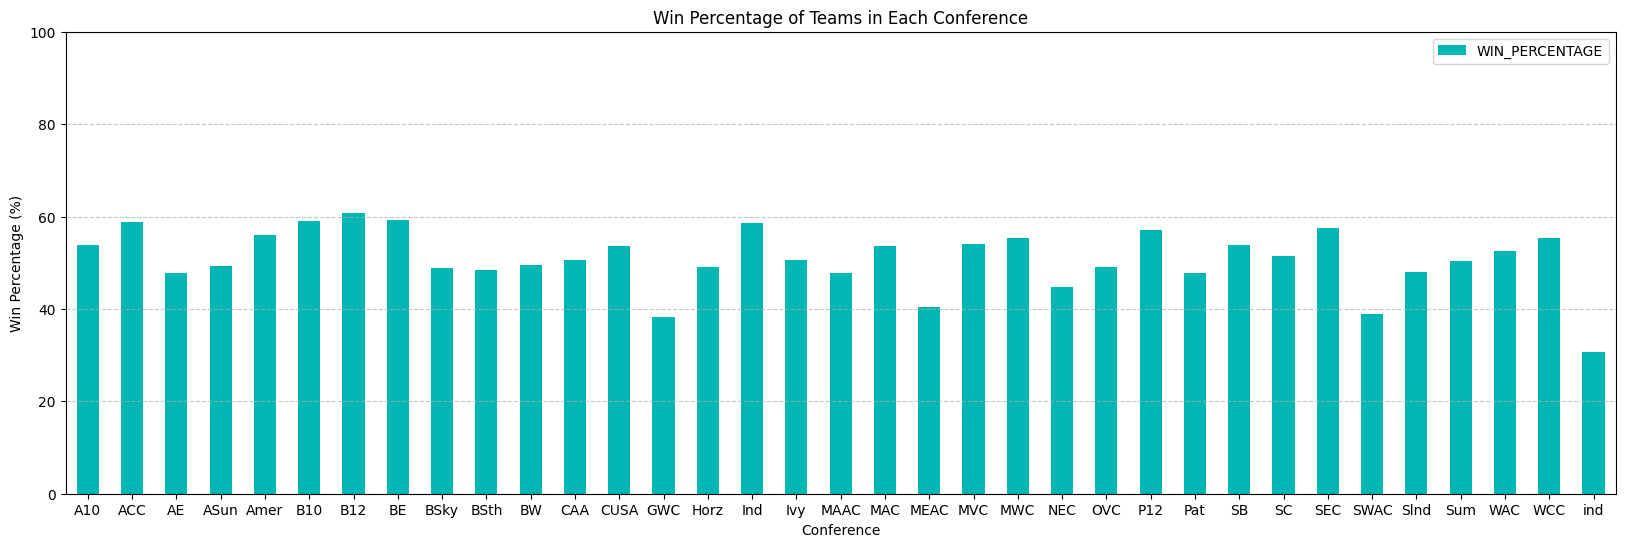

In [ ]:
plt.figure(figsize=(20, 6))
conference_win_percentage = mmd.groupby('CONF')['WIN_PERCENTAGE'].mean()
conference_win_percentage.plot(kind='bar', color='#00b7b3')
plt.title('Win Percentage of Teams in Each Conference')
plt.xlabel('Conference')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

Mean Squared Error: 19.36965770606007


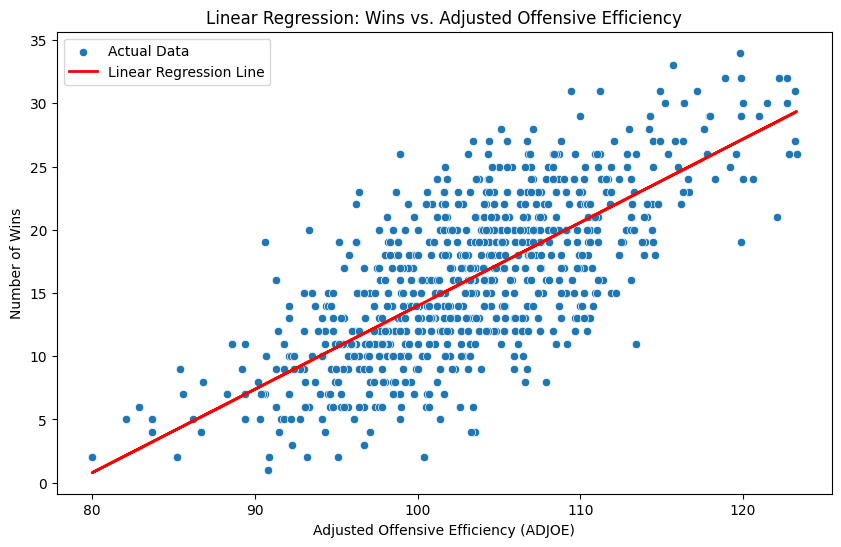

In [ ]:
# Selecting predictor and target variables
X = mmd[['ADJOE']]
y = mmd['W']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions on the test set
predictions = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting the regression line and scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['ADJOE'], y=y_test, label='Actual Data')
plt.plot(X_test['ADJOE'], predictions, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Wins vs. Adjusted Offensive Efficiency')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

Mean Squared Error: 24.363615184365777


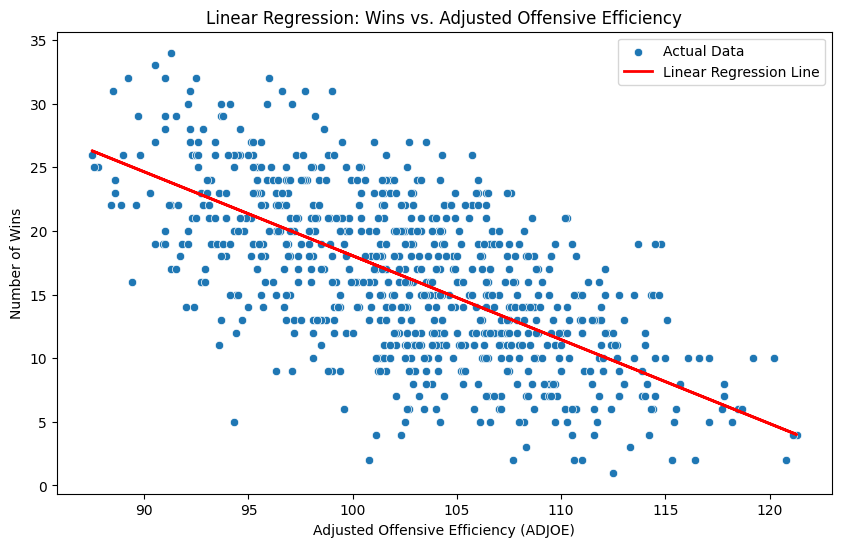

In [ ]:
# Selecting predictor and target variables
X = mmd[['ADJDE']]
y = mmd['W']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Predictions on the test set
predictions = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting the regression line and scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['ADJDE'], y=y_test, label='Actual Data')
plt.plot(X_test['ADJDE'], predictions, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Wins vs. Adjusted Offensive Efficiency')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

R-squared: 0.6281
Adjusted R-squared: 0.6272
Mean Squared Error: 15.021918450031881


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


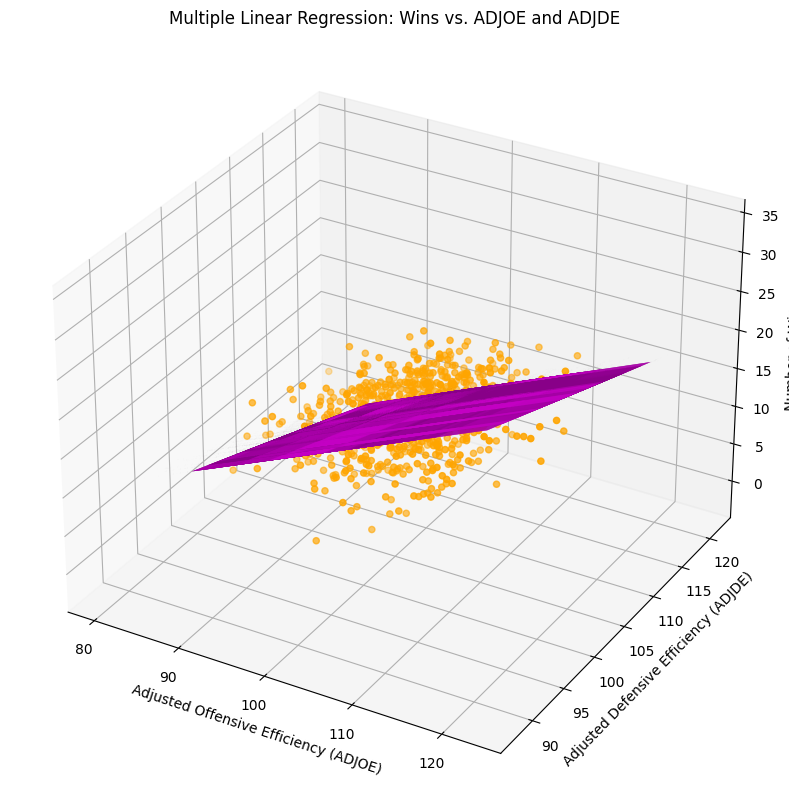

In [ ]:
# Selecting predictor variables
X = mmd[['ADJOE', 'ADJDE']]
y = mmd['W']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Predictions on the test set
predictions = model3.predict(X_test)

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared:.4f}')

# Calculate adjusted R-squared
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared:.4f}')

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting the regression planes
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(X_test['ADJOE'], X_test['ADJDE'], y_test, label='Actual Data', color='orange')

# Creating a meshgrid for the plane
adjoes = X_test['ADJOE']
adjdes = X_test['ADJDE']
adjoes, adjdes = np.meshgrid(adjoes, adjdes)
wins_pred = model3.predict(np.c_[adjoes.ravel(), adjdes.ravel()])
wins_pred = wins_pred.reshape(adjoes.shape)

# Plotting the regression plane
ax.plot_surface(adjoes, adjdes, wins_pred, alpha=0.5, color='magenta', label='Regression Plane')

ax.set_xlabel('Adjusted Offensive Efficiency (ADJOE)')
ax.set_ylabel('Adjusted Defensive Efficiency (ADJDE)')
ax.set_zlabel('Number of Wins')
ax.set_title('Multiple Linear Regression: Wins vs. ADJOE and ADJDE')

plt.show()

    Year  Offense_Rsquared  Defense_Rsquared
0   2013          0.668862          0.627358
1   2014          0.641742          0.580307
2   2015          0.702899          0.587250
3   2016          0.661516          0.602281
4   2017          0.631700          0.539774
5   2018          0.623551          0.599520
6   2019          0.610200          0.563293
7   2020          0.615053          0.520053
8   2021          0.623375          0.511045
9   2022          0.647868          0.576521
10  2023          0.612316          0.517704


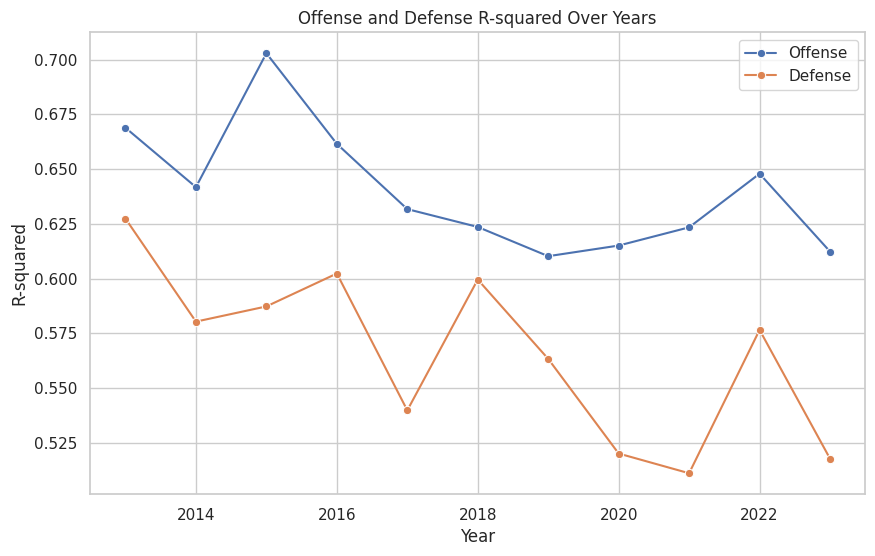

In [ ]:
# Create an empty DataFrame to store R-squared values
rsquared_mmd = pd.DataFrame(columns=['Year', 'Offense_Rsquared', 'Defense_Rsquared'])

# Loop over unique years
for year in mmd['Year'].unique():
    # Subset the data for the current year
    year_data = mmd[mmd['Year'] == year]

    # Split the data into features (X) and target variable (y)
    XD_year = year_data[['ADJDE', 'EFG_D', 'TORD', 'DRB', 'FTRD', '2P_D', '3P_D']]
    XO_year = year_data[['ADJOE', 'EFG_O', 'TOR', 'ORB', 'FTR', '2P_O', '3P_O']]
    y_year = year_data['WIN_PERCENTAGE']

    # Create linear regression models for each set of variables
    model_Offense = LinearRegression()
    model_Defense = LinearRegression()

    # Train the models on the data for the current year
    model_Offense.fit(XO_year, y_year)
    model_Defense.fit(XD_year, y_year)

    # Make predictions for each set of variables
    y_Offense = model_Offense.predict(XO_year)
    y_Defense = model_Defense.predict(XD_year)

    # Calculate R-squared for each set of variables
    r2_Offense = r2_score(y_year, y_Offense)
    r2_Defense = r2_score(y_year, y_Defense)

    # Create a new DataFrame with the current result
    result_df = pd.DataFrame({'Year': [year], 'Offense_Rsquared': [r2_Offense], 'Defense_Rsquared': [r2_Defense]})

    # Concatenate the DataFrames
    rsquared_mmd = pd.concat([rsquared_mmd, result_df], ignore_index=True)

# Display the updated DataFrame
print(rsquared_mmd)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Offense_Rsquared', data=rsquared_mmd, label='Offense', marker='o')
sns.lineplot(x='Year', y='Defense_Rsquared', data=rsquared_mmd, label='Defense', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('R-squared')
plt.title('Offense and Defense R-squared Over Years')

# Show legend
plt.legend()

# Show the plot
plt.show()

,CONF,# of NCAA Tournament Appearances
0,B10,72
1,ACC,65
2,B12,65
3,BE,55
4,SEC,54
5,P12,44
6,A10,30
7,MWC,26
8,Amer,25
9,WCC,19


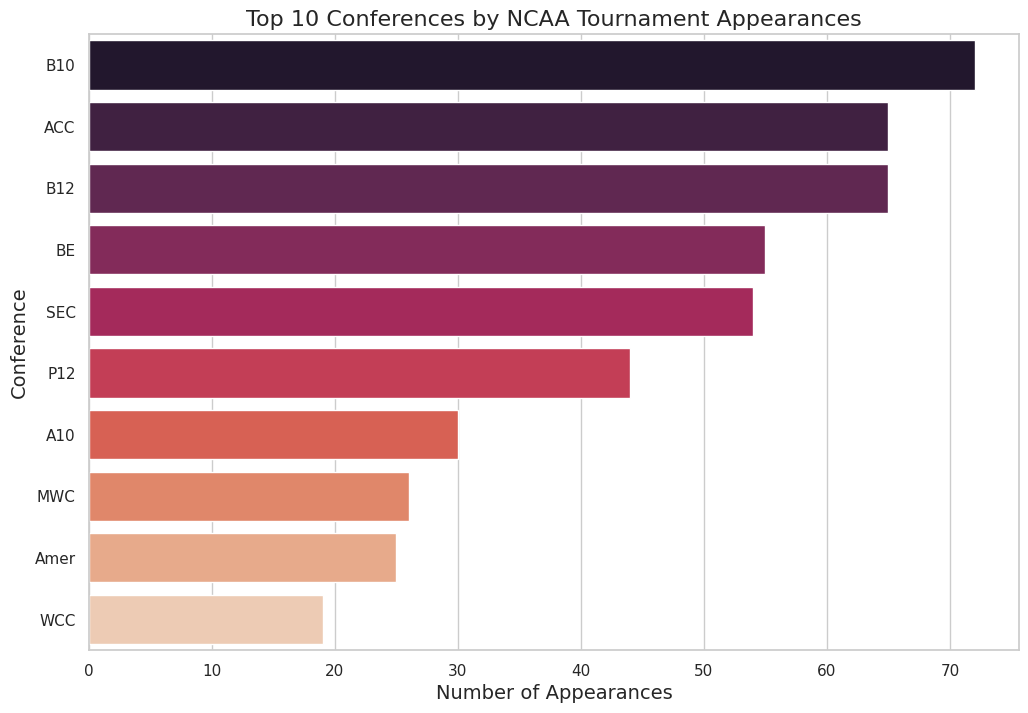

In [ ]:
condition = mmd['POSTSEASON'].notnull()

# Count occurrences based on the condition and group by 'Category'
result = mmd[condition].groupby('CONF').size().reset_index(name='# of NCAA Tournament Appearances').sort_values(by='# of NCAA Tournament Appearances', ascending = False)

result = result.reset_index(drop=True)

top10 = result.head(10)
display(top10)

sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='# of NCAA Tournament Appearances', y='CONF', data=top10, palette='rocket')

# Add labels and title
plt.title('Top 10 Conferences by NCAA Tournament Appearances', fontsize=16)
plt.xlabel('Number of Appearances', fontsize=14)
plt.ylabel('Conference', fontsize=14)

# Display the bar plot
plt.show()

In [ ]:
# column for percentage wins
mmd['WIN_PERCENTAGE'] = (mmd['W'] / mmd['G']) * 100
mmd.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,Year,Pre-Covid?,POSTSEASON,WIN_PERCENTAGE
0,Indiana,B10,36,29,121.0,89.7,0.9692,54.7,44.0,19.3,...,27.0,52.0,43.2,40.3,30.4,67.8,2013,Yes,S16,80.555556
1,Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,...,29.9,55.0,42.1,36.5,32.9,65.1,2013,Yes,R32,91.176471
2,Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,...,32.0,52.9,39.3,36.4,30.3,67.7,2013,Yes,S16,83.783784
3,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,2013,Yes,Champions,87.500000
4,Georgetown,BE,32,25,107.6,85.0,0.9381,51.1,43.0,20.1,...,35.3,50.2,41.4,35.3,30.7,62.5,2013,Yes,R64,78.125000


    Year  Offense_Rsquared  Defense_Rsquared  R_squared_Difference
0   2013          0.701154          0.595240              0.105914
1   2014          0.583578          0.500946              0.082632
2   2015          0.754612          0.507711              0.246901
3   2016          0.807784          0.661050              0.146734
4   2017          0.648994          0.442095              0.206899
5   2018          0.543638          0.626882             -0.083244
6   2019          0.685412          0.525047              0.160364
7   2020          0.459684          0.498658             -0.038974
8   2021          0.716294          0.628780              0.087514
9   2022          0.609069          0.689241             -0.080172
10  2023          0.661908          0.501619              0.160289


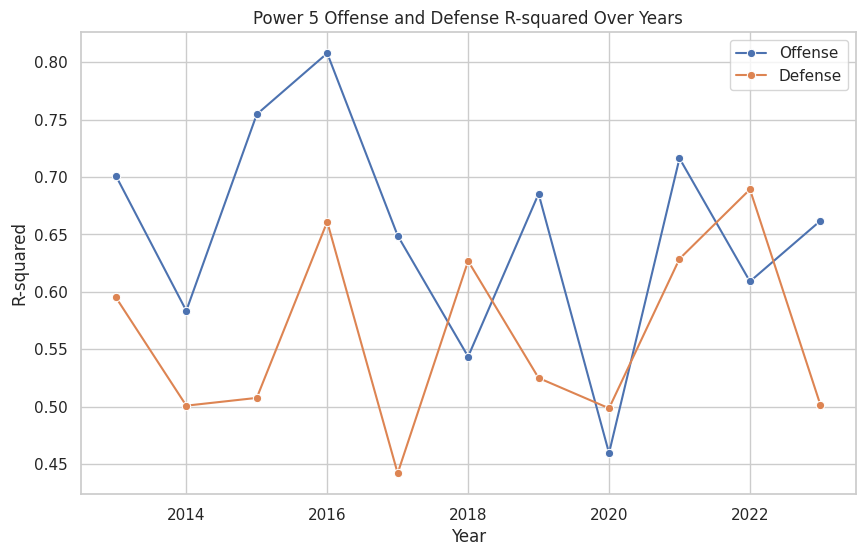

In [ ]:
# analysing offense and defense of Power 5 schools compared to overall
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# list of conferences to include
desired_conferences = ['SEC', 'B10', 'B12', 'ACC', 'P12']

# dataframe to store rsquared values
rsquared_mmd = pd.DataFrame(columns=['Year', 'Offense_Rsquared', 'Defense_Rsquared'])

# Loop over unique years
for year in mmd['Year'].unique():
    # Subset the data for the current year and desired conferences
    year_data = mmd[(mmd['Year'] == year) & (mmd['CONF'].isin(desired_conferences))]

    # Split the data into features (X) and target variable (y)
    XD_year = year_data[['ADJDE', 'EFG_D', 'TORD', 'DRB', 'FTRD', '2P_D', '3P_D']]
    XO_year = year_data[['ADJOE', 'EFG_O', 'TOR', 'ORB', 'FTR', '2P_O', '3P_O']]
    y_year = year_data['WIN_PERCENTAGE']

    # Create linear regression models for each set of variables
    model_Offense = LinearRegression()
    model_Defense = LinearRegression()

    # Train the models on the data for the current year
    model_Offense.fit(XO_year, y_year)
    model_Defense.fit(XD_year, y_year)

    # Make predictions for each set of variables
    y_Offense = model_Offense.predict(XO_year)
    y_Defense = model_Defense.predict(XD_year)

    # Calculate R-squared for each set of variables
    r2_Offense = r2_score(y_year, y_Offense)
    r2_Defense = r2_score(y_year, y_Defense)

    # Create a new DataFrame with the current result
    result_df = pd.DataFrame({'Year': [year], 'Offense_Rsquared': [r2_Offense], 'Defense_Rsquared': [r2_Defense]})

    # Concatenate the DataFrames
    rsquared_mmd = pd.concat([rsquared_mmd, result_df], ignore_index=True)

#add difference column
rsquared_mmd['R_squared_Difference'] = rsquared_mmd['Offense_Rsquared'] - rsquared_mmd['Defense_Rsquared']
print(rsquared_mmd)
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Offense_Rsquared', data=rsquared_mmd, label='Offense', marker='o')
sns.lineplot(x='Year', y='Defense_Rsquared', data=rsquared_mmd, label='Defense', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('R-squared')
plt.title('Power 5 Offense and Defense R-squared Over Years')

# Show legend
plt.legend()

# Show the plot
plt.show()

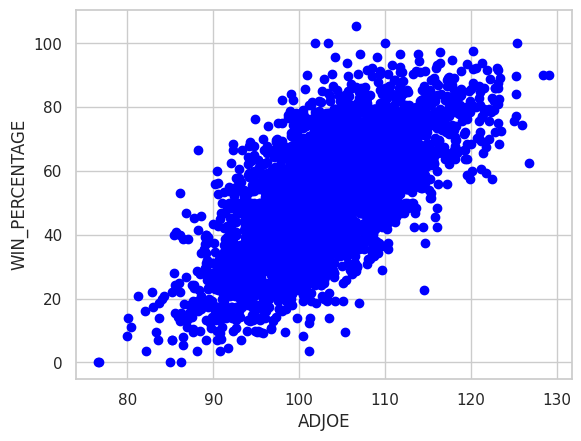

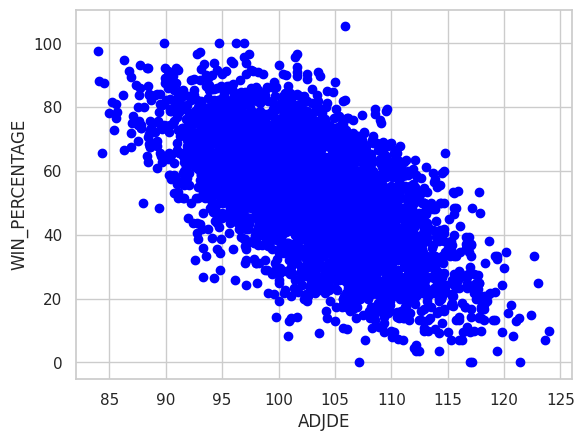

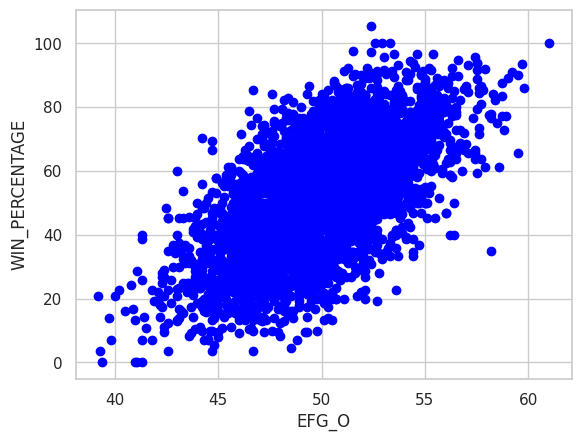

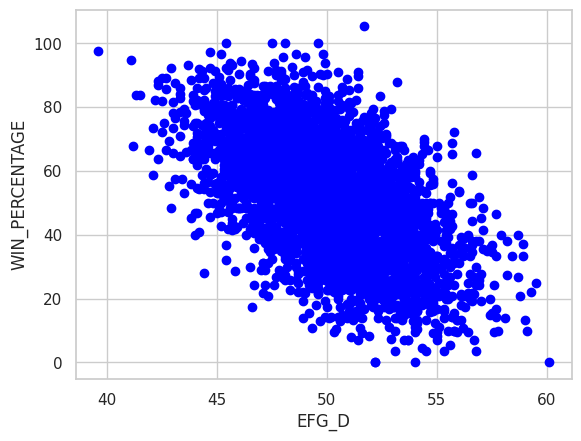

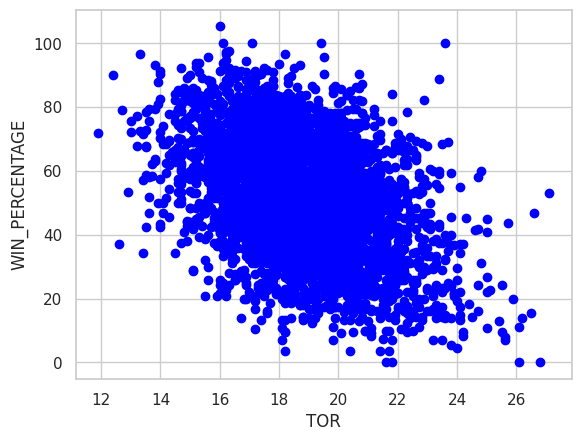

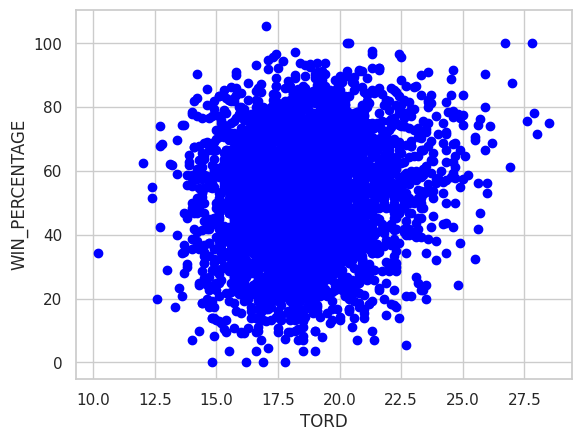

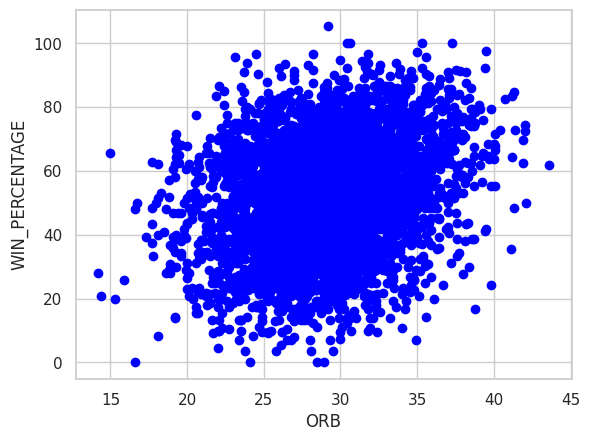

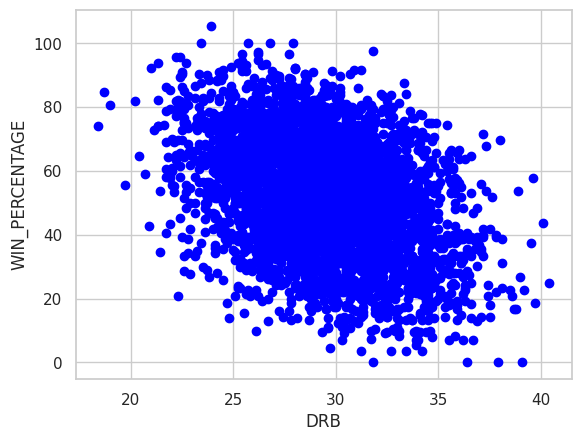

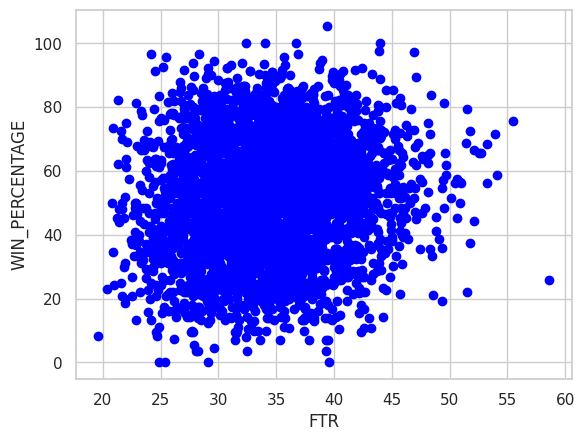

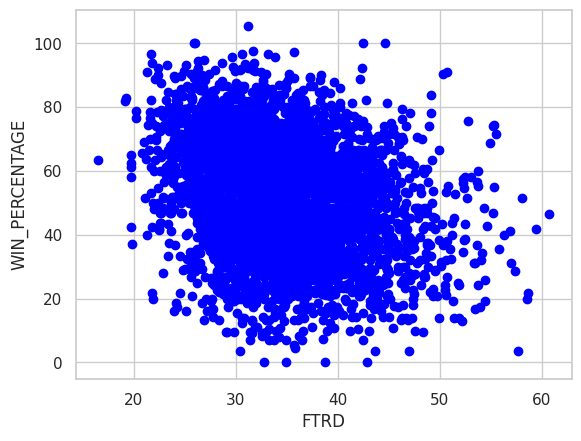

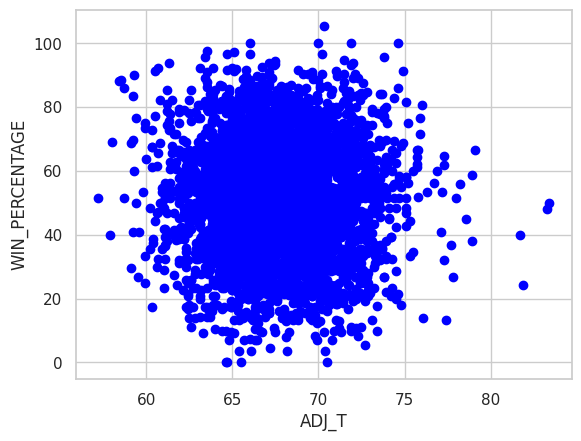

In [ ]:
plt.scatter(mmd.ADJOE, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('ADJOE')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.ADJDE, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('ADJDE')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.EFG_O, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('EFG_O')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.EFG_D, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('EFG_D')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.TOR, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('TOR')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.TORD, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('TORD')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.ORB, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('ORB')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.DRB, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('DRB')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.FTR, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('FTR')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.FTRD, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('FTRD')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

plt.scatter(mmd.ADJ_T, mmd.WIN_PERCENTAGE, color='blue')
plt.xlabel('ADJ_T')
plt.ylabel('WIN_PERCENTAGE')
plt.show()

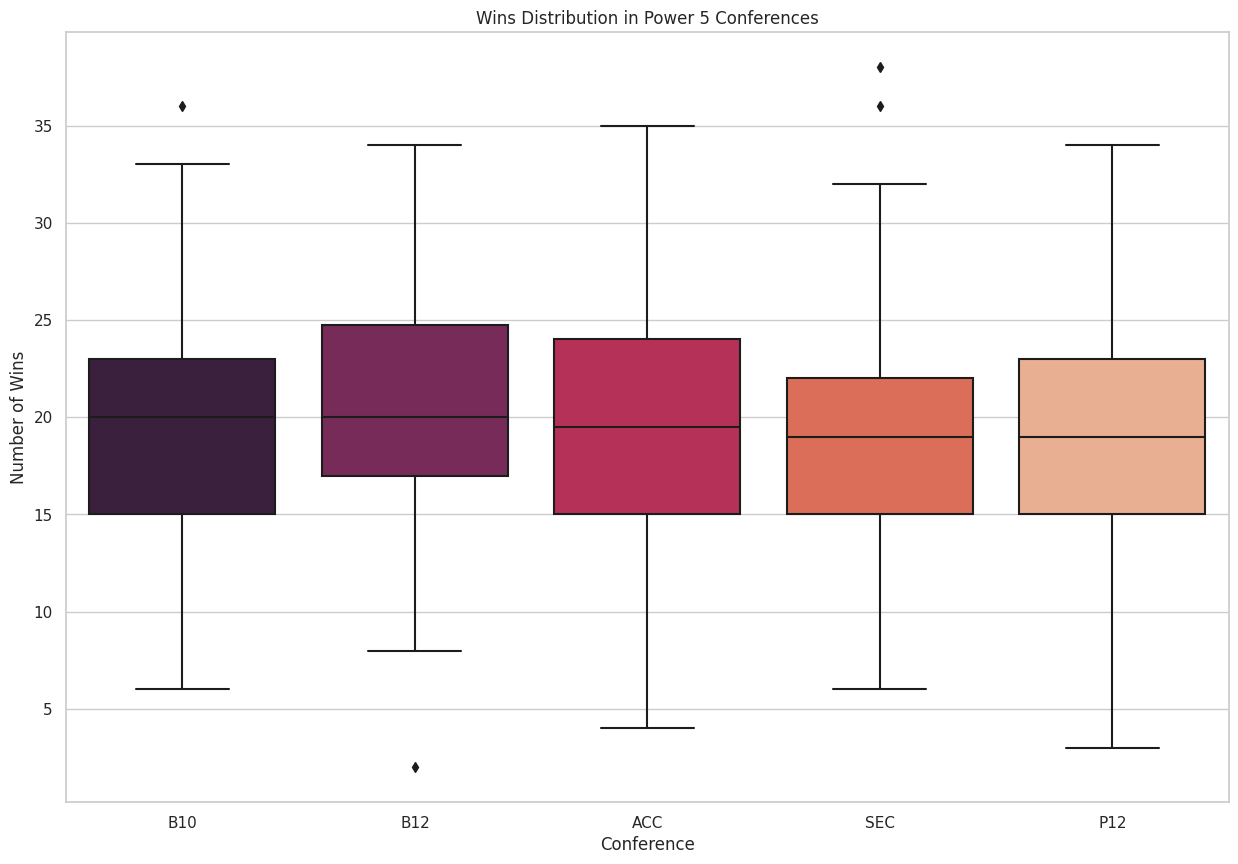

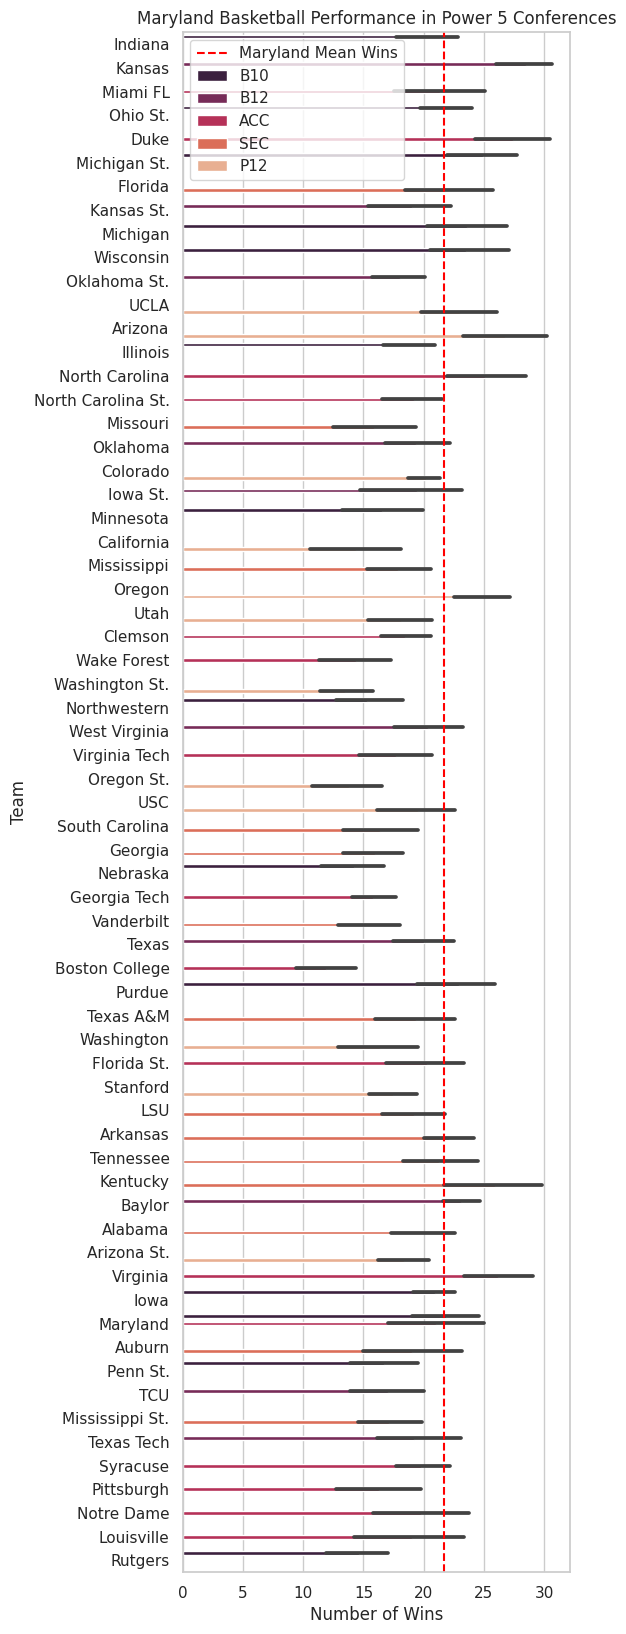

<ipython-input-26-fb35d3ee0a7c>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='W', y='TEAM', data=power_5_data, hue='CONF', dodge=True, palette='Set2', hue_order=['ACC', 'SEC', 'B10', 'B12', 'P12'], ci=None)
<ipython-input-26-fb35d3ee0a7c>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='W', y='TEAM', data=maryland_data[maryland_data['Pre-Covid?'] == 'No'], hue='CONF', dodge=True, palette='coolwarm', alpha=0.7, ci=None)


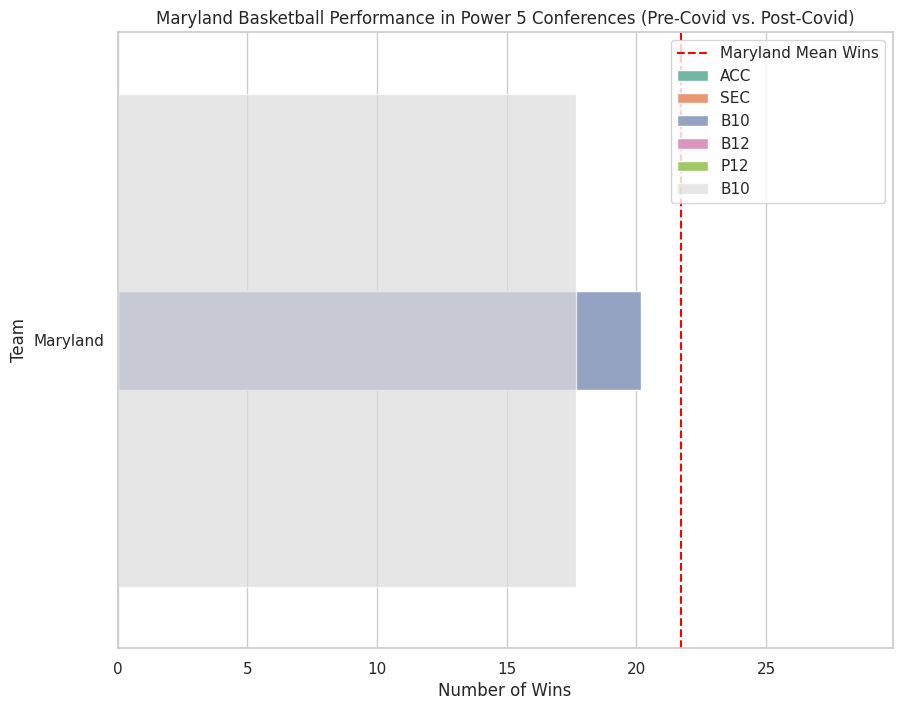

Summary Statistics for Maryland in Power 5 Conferences:
               W       ADJOE     ADJDE    BARTHAG
count  11.000000   11.000000  11.00000  11.000000
mean   21.727273  111.100000  95.40000   0.848818
std     4.337993    2.722132   2.22935   0.042764
min    15.000000  106.100000  92.70000   0.737800
25%    18.000000  109.350000  93.65000   0.835100
50%    23.000000  111.600000  94.70000   0.861900
75%    24.500000  113.000000  97.05000   0.876600
max    28.000000  114.900000  99.40000   0.887500


In [ ]:
# Filter data for Power 5 conferences
power_5_conferences = ['ACC', 'SEC', 'B10', 'B12', 'P12']
power_5_data = mmd[mmd['CONF'].isin(power_5_conferences)]

# Filter data for Maryland
maryland_data = power_5_data[power_5_data['TEAM'] == 'Maryland']

# Summary statistics for Maryland
maryland_stats = maryland_data.describe()

# Boxplot: Wins distribution in the Power 5 conferences
plt.figure(figsize=(15, 10))
sns.boxplot(x='CONF', y='W', data=power_5_data, palette='rocket')
plt.title('Wins Distribution in Power 5 Conferences')
plt.xlabel('Conference')
plt.ylabel('Number of Wins')
plt.show()

# Bar plot: Maryland's performance compared to other teams in Power 5
plt.figure(figsize=(5, 20))
sns.barplot(x='W', y='TEAM', data=power_5_data, hue='CONF', dodge=True, palette='rocket')
plt.axvline(x=maryland_stats.loc['mean', 'W'], color='red', linestyle='--', label='Maryland Mean Wins')
plt.title('Maryland Basketball Performance in Power 5 Conferences')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.legend()
plt.show()

# Bar plot: Maryland's performance compared to other teams in Power 5, considering Post-Covid
plt.figure(figsize=(10, 8))
sns.barplot(x='W', y='TEAM', data=power_5_data, hue='CONF', dodge=True, palette='Set2', hue_order=['ACC', 'SEC', 'B10', 'B12', 'P12'], ci=None)
sns.barplot(x='W', y='TEAM', data=maryland_data[maryland_data['Pre-Covid?'] == 'No'], hue='CONF', dodge=True, palette='coolwarm', alpha=0.7, ci=None)

# Plotting the mean wins for Maryland
plt.axvline(x=maryland_stats.loc['mean', 'W'], color='red', linestyle='--', label='Maryland Mean Wins')
plt.title('Maryland Basketball Performance in Power 5 Conferences (Pre-Covid vs. Post-Covid)')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.legend()
plt.show()


# Print summary statistics for Maryland
print("Summary Statistics for Maryland in Power 5 Conferences:")
print(maryland_stats[['W', 'ADJOE', 'ADJDE', 'BARTHAG']])


In [ ]:
predictors = ['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T']
train = mmd[mmd["Year"]<2023]
test = mmd[mmd["Year"]==2023]

reg = Ridge(alpha=0.1)
reg.fit(train[predictors],train["WIN_PERCENTAGE"])
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index = test.index)
combination = pd.concat([test[["TEAM", "WIN_PERCENTAGE"]],predictions],axis=1)
combination.sort_values("WIN_PERCENTAGE", ascending = False).head(20)
combination.set_index('TEAM')
combination[combination['TEAM']=='Maryland']
coefficients = pd.Series(predictions.coef_, index=predictors)

AttributeError: ignored

In [ ]:
mean_squared_error(combination["WIN_PERCENTAGE"], combination["predictions"])

2.5094085759254168

# OLS Regressions

**Model 1 general**

In [ ]:
# Model 1 with all variables (OLS)

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)
formula = 'WIN_PERCENTAGE ~ ADJOE + ADJDE + EFG_O + EFG_D + TOR + TORD + ORB + DRB + FTR + FTRD + ADJ_T'

# Fit the OLS model using the formula
model = sm.OLS.from_formula(formula, data=mmd)
results = model.fit()

# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         WIN_PERCENTAGE   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1827.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:35:56   Log-Likelihood:                -13195.
No. Observations:                3876   AIC:                         2.641e+04
Df Residuals:                    3864   BIC:                         2.649e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0640      5.873      2.395      0.0

**Model 1 adjusted for only Power 5 conferences**

In [ ]:
# Filter data for Power 5 conferences
power_5_conferences = ['ACC', 'SEC', 'B10', 'B12', 'P12']
power_5_data = mmd[mmd['CONF'].isin(power_5_conferences)]

# Fit the OLS model using the formula
model = sm.OLS.from_formula(formula, data=power_5_data)
results = model.fit()

# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         WIN_PERCENTAGE   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.23e-276
Time:                        00:35:56   Log-Likelihood:                -2275.5
No. Observations:                 708   AIC:                             4575.
Df Residuals:                     696   BIC:                             4630.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.2812     10.816      4.002      0.0

**Model 1 adjusted for UMD only - weird result ?? check for assumptions**

In [ ]:
# Filter data for Maryland
maryland_data = power_5_data[power_5_data['TEAM'] == 'Maryland']

# OLS regression of all values for Power 5 only

# Fit the OLS model using the formula
model = sm.OLS.from_formula(formula, data=maryland_data)
results = model.fit()

# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         WIN_PERCENTAGE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        00:35:57   Log-Likelihood:                 279.97
No. Observations:                  11   AIC:                            -537.9
Df Residuals:                       0   BIC:                            -533.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.9239        inf          0        n

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
display(maryland_data)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,Year,Pre-Covid?,POSTSEASON,WIN_PERCENTAGE
216,Maryland,ACC,38,25,106.1,92.7,0.8254,51.6,43.6,22.2,...,29.7,51.9,42.7,33.9,30.3,67.2,2013,Yes,NaN,65.789474
546,Maryland,ACC,32,17,108.1,94.5,0.8237,49.1,47.2,18.6,...,42.1,47.8,45.4,34.2,34.1,69.1,2014,Yes,NaN,53.125000
997,Maryland,B10,35,28,110.2,94.0,0.8619,51.2,45.5,18.9,...,28.1,48.0,44.1,37.6,31.8,64.5,2015,Yes,R32,80.000000
1208,Maryland,B10,35,26,114.9,96.3,0.8839,55.2,46.5,18.9,...,27.0,55.8,45.5,36.2,32.1,67.9,2016,Yes,S16,74.285714
1423,Maryland,B10,32,24,113.4,97.9,0.8448,52.4,47.5,19.0,...,32.6,51.0,45.6,36.3,34.2,68.6,2017,Yes,R64,75.000000
1783,Maryland,B10,31,19,113.9,97.8,0.8530,54.3,47.5,20.4,...,24.0,53.9,45.6,36.8,33.8,67.5,2018,Yes,NaN,61.290323
2123,Maryland,B10,34,23,111.6,93.3,0.8875,51.4,45.9,19.4,...,26.6,50.8,44.7,34.9,31.9,67.7,2019,Yes,R32,67.647059
2480,Maryland,B10,31,24,112.6,94.7,0.8797,48.6,46.1,16.7,...,24.2,50.1,44.5,31.1,32.5,67.1,2020,Yes,NaN,77.419355
2846,Maryland,B10,28,16,110.0,93.0,0.8735,52.6,48.5,16.8,...,25.6,52.8,46.4,34.9,34.3,65.4,2021,No,R32,57.142857
3265,Maryland,B10,32,15,108.7,99.4,0.7378,49.4,50.2,16.8,...,24.6,49.7,48.2,32.6,35.5,66.7,2022,No,NaN,46.875000


**Model 2 general**

In [ ]:
# Model 2 - without less significant  (OLS)

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)
formula2 = 'WIN_PERCENTAGE ~ ADJOE + ADJDE + EFG_O + EFG_D + TOR + TORD + ORB + DRB'

# Fit the OLS model using the formula
model = sm.OLS.from_formula(formula2, data=mmd)
results = model.fit()

# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         WIN_PERCENTAGE   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2167.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:35:57   Log-Likelihood:                -13433.
No. Observations:                3876   AIC:                         2.688e+04
Df Residuals:                    3867   BIC:                         2.694e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3195      5.951      4.423      0.0

**Model 2 Power 5**

In [ ]:
# Filter data for Power 5 conferences
power_5_conferences = ['ACC', 'SEC', 'B10', 'B12', 'P12']
power_5_data = mmd[mmd['CONF'].isin(power_5_conferences)]

# Fit the OLS model using the formula
model = sm.OLS.from_formula(formula2, data=power_5_data)
results = model.fit()

# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         WIN_PERCENTAGE   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     438.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.41e-266
Time:                        00:35:57   Log-Likelihood:                -2307.3
No. Observations:                 708   AIC:                             4633.
Df Residuals:                     699   BIC:                             4674.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.8862     10.969      4.366      0.0

# Data Limitations and "Win" Correlation

In [ ]:
md = pd.DataFrame(mmd)
md['WIN_PERCENTAGE'] = (mmd['W'] / mmd['G']) * 100

In [ ]:
conference_wins = md.groupby('CONF')['WIN_PERCENTAGE'].mean().sort_values(ascending = False)
print(conference_wins)

CONF
B12     60.857416
BE      59.263637
B10     59.064300
ACC     58.709028
Ind     58.620690
SEC     57.485917
P12     56.998435
Amer    55.997419
WCC     55.368314
MWC     55.245255
MVC     54.091099
A10     53.885934
SB      53.780025
MAC     53.720081
CUSA    53.546322
WAC     52.534558
SC      51.558194
CAA     50.590476
Ivy     50.549540
Sum     50.288290
BW      49.431518
ASun    49.262060
OVC     49.058537
Horz    48.983959
BSky    48.786060
BSth    48.422985
Slnd    48.096137
Pat     47.872791
AE      47.723450
MAAC    47.693096
NEC     44.848188
MEAC    40.461544
SWAC    38.887996
GWC     38.290020
ind     30.676819
Name: WIN_PERCENTAGE, dtype: float64


In [ ]:
compare = pd.DataFrame()

In [ ]:
compare['team_appearances'] = md.groupby('TEAM')['POSTSEASON'].count().sort_values(ascending = False)
compare['team_appearances']

TEAM
Gonzaga                   10
Michigan St.              10
Kansas                    10
Villanova                  9
Duke                       9
                          ..
Marist                     0
Maryland Eastern Shore     0
McNeese St.                0
Merrimack                  0
Youngstown St.             0
Name: team_appearances, Length: 368, dtype: int64

In [ ]:
compare['team_wins'] = md.groupby('TEAM')['WIN_PERCENTAGE'].mean().sort_values(ascending = False)
print(compare['team_wins'])

TEAM
Gonzaga                   88.937200
Michigan St.              70.888612
Kansas                    80.427685
Villanova                 77.476514
Duke                      76.994070
                            ...    
Marist                    33.252490
Maryland Eastern Shore    32.762341
McNeese St.               38.784707
Merrimack                 55.298132
Youngstown St.            46.572835
Name: team_wins, Length: 368, dtype: float64


In [ ]:
compare2 = pd.DataFrame()

In [ ]:
compare2['conf_wins'] = md.groupby('CONF')['WIN_PERCENTAGE'].mean().sort_values(ascending = False)
compare2['conf_appearance'] = md.groupby('CONF')['POSTSEASON'].count().sort_values(ascending = False)

In [ ]:
postseason_winper_conf = compare2['conf_wins'].corr(compare2['conf_appearance'])

0.6541389126354024


Text(0.5, 1.0, 'R-squared: 0.42789771702382656')

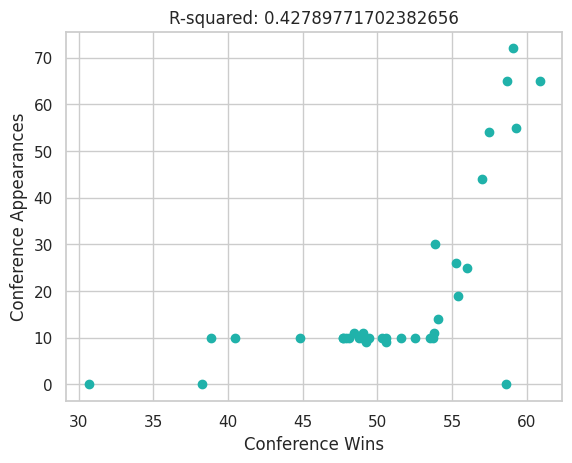

In [ ]:
from scipy.stats import pearsonr

correlation, pvalue = pearsonr(compare2['conf_wins'], compare2['conf_appearance'])
print(correlation)
corr = correlation*correlation
plt.scatter(compare2['conf_wins'], compare2['conf_appearance'], color = 'lightseagreen')
plt.xlabel('Conference Wins')
plt.ylabel('Conference Appearances')
plt.title('R-squared: {}'.format(corr))

0.7149701958535659


Text(0.5, 1.0, 'R-squared: 0.5111823809588864')

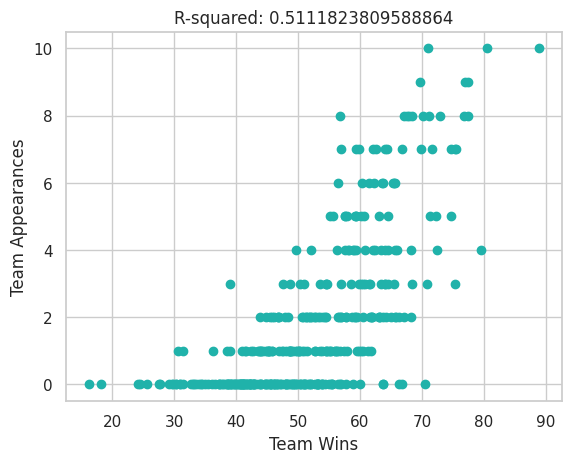

In [ ]:
correlation2, pvalue2 = pearsonr(compare['team_wins'], compare['team_appearances'])
print(correlation2)
corr2 = correlation2*correlation2
plt.scatter(compare['team_wins'], compare['team_appearances'], color = 'lightseagreen')
plt.xlabel('Team Wins')
plt.ylabel('Team Appearances')
plt.title('R-squared: {}'.format(corr2))

In [ ]:
options = ['B10', 'ACC', 'B12', 'SEC', 'P12']
mmmd = mmd[mmd['CONF'].isin(options)]

0.8861881260513188


Text(0.5, 1.0, 'R-squared: 0.7853293947543482')

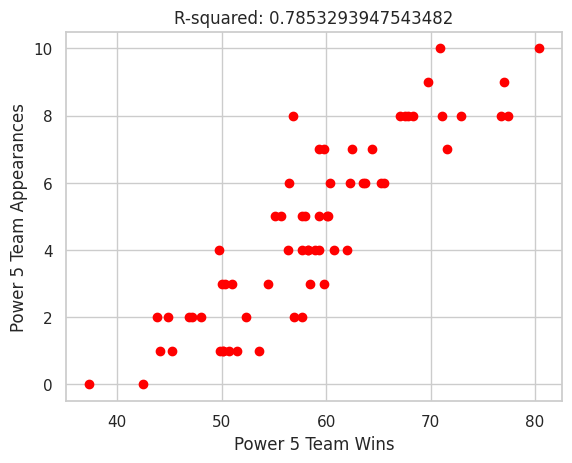

In [ ]:
power = pd.DataFrame()
power['Power_team_wins'] = mmmd.groupby('TEAM')['WIN_PERCENTAGE'].mean().sort_values(ascending = False)
power['Power_team_appearances'] = mmmd.groupby('TEAM')['POSTSEASON'].count().sort_values(ascending = False)

correlation3, pvalue3 = pearsonr(power['Power_team_wins'], power['Power_team_appearances'])
print(correlation3)
corr3 = correlation3*correlation3
plt.scatter(power['Power_team_wins'], power['Power_team_appearances'], color = 'red')
plt.xlabel('Power 5 Team Wins')
plt.ylabel('Power 5 Team Appearances')
plt.title('R-squared: {}'.format(corr3))

0.7464361434967255


Text(0.5, 1.0, 'R-squared: 0.5571669163182642')

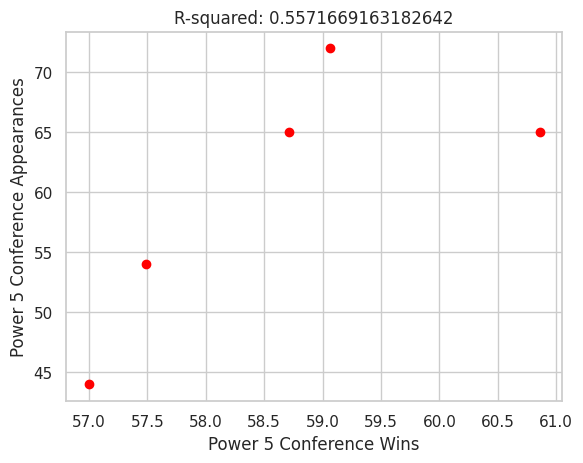

In [ ]:
power2 = pd.DataFrame()
power2['Power_conf_wins'] = mmmd.groupby('CONF')['WIN_PERCENTAGE'].mean().sort_values(ascending = False)
power2['Power_conf_appearances'] = mmmd.groupby('CONF')['POSTSEASON'].count().sort_values(ascending = False)

correlation4, pvalue4 = pearsonr(power2['Power_conf_wins'], power2['Power_conf_appearances'])
print(correlation4)
corr4 = correlation4*correlation4
plt.scatter(power2['Power_conf_wins'], power2['Power_conf_appearances'], color = 'red')
plt.xlabel('Power 5 Conference Wins')
plt.ylabel('Power 5 Conference Appearances')
plt.title('R-squared: {}'.format(corr4))